https://www.kaggle.com/viswanathanc/time-series-stock-price-predictions-part-1

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from subprocess import check_output
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
warnings.filterwarnings('ignore')

C:\Users\Lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  if __name__ == '__main__':


# Reading CSV file

In [2]:
df = pd.read_csv("E:\\IIT Kanpur\\Placements\\Projects\\SBI Stock price prediction\\SBIN.NS.csv", usecols=['Date', 'Close'],
                parse_dates=['Date'], index_col='Date')
df.head()

,Close
Date,
2015-07-17,271.100006
2015-07-20,267.450012
2015-07-21,264.299988
2015-07-22,268.549988
2015-07-23,270.049988


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1228 entries, 2015-07-17 to 2020-07-16
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1228 non-null   float64
dtypes: float64(1)
memory usage: 19.2 KB


In [4]:
df.shape[0]

1228

In [5]:
#helper function to plot the stock prediction
prev_values = df.iloc[:int(df.shape[0]*0.8)]
y_test = df.iloc[int(df.shape[0]*0.8):]

In [6]:
def plot_pred(pred, title):
    plt.figure(figsize=(20,12))
    plt.plot(prev_values, label='Train')
    plt.plot(y_test, label='Actual')
    plt.plot(pred, label='Predicted')
    plt.ylabel("Stock prices")
    plt.title(title, fontsize = 20)
    plt.legend()
    plt.show()

# 1. Average

This is the simplest model. We will get as average of the previous values and predict it as the forecast.

In [7]:
#Average of previous values
y_av = pd.DataFrame(np.repeat(prev_values.mean(), y_test.shape[0]))

In [8]:
y_av.index = y_test.index

In [9]:
def mse(y_pred, y_test):
    return mean_squared_error(y_pred, y_test)

In [10]:
mse(y_av, y_test)

4144.0431137851665

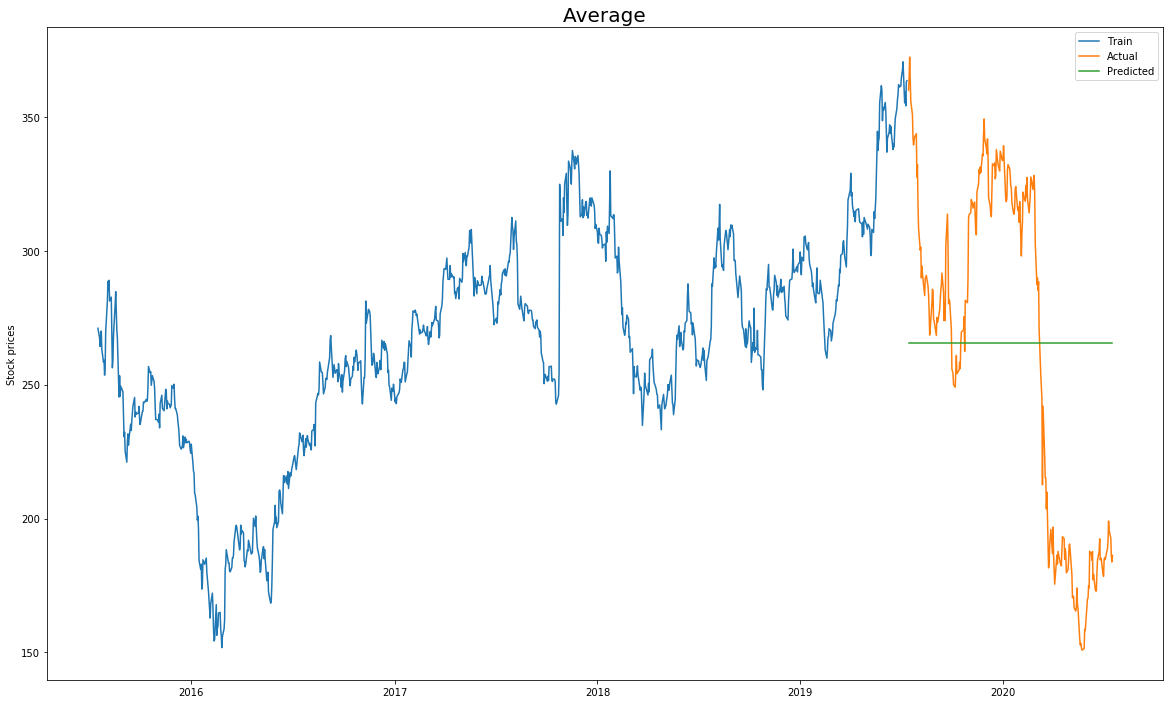

In [11]:
plot_pred(y_av,"Average")

# 2. Weighted Mean

We shall give more weightage to the data which are close to the last day in training data, while calculating the mean. The last day in the training set will get a weightage of 1(=982/982) and the first day will get a weightage of 1/982.

In [12]:
weight = np.array(range(0,982))/982

In [13]:
weight = weight.reshape((982, 1))
weight.shape

(982, 1)

In [14]:
weighted_train_data = np.multiply(prev_values, weight)

In [15]:
# weighted average is the sum of this weighted train data by the sum of the weight
weighted_average = np.sum(weighted_train_data)/np.sum(weight)

In [16]:
#Average of previous values
y_wa = pd.DataFrame(np.repeat(weighted_average, y_test.shape[0]))

In [17]:
y_wa.index = y_test.index

In [18]:
mse(y_wa,y_test)

4445.3343652658605

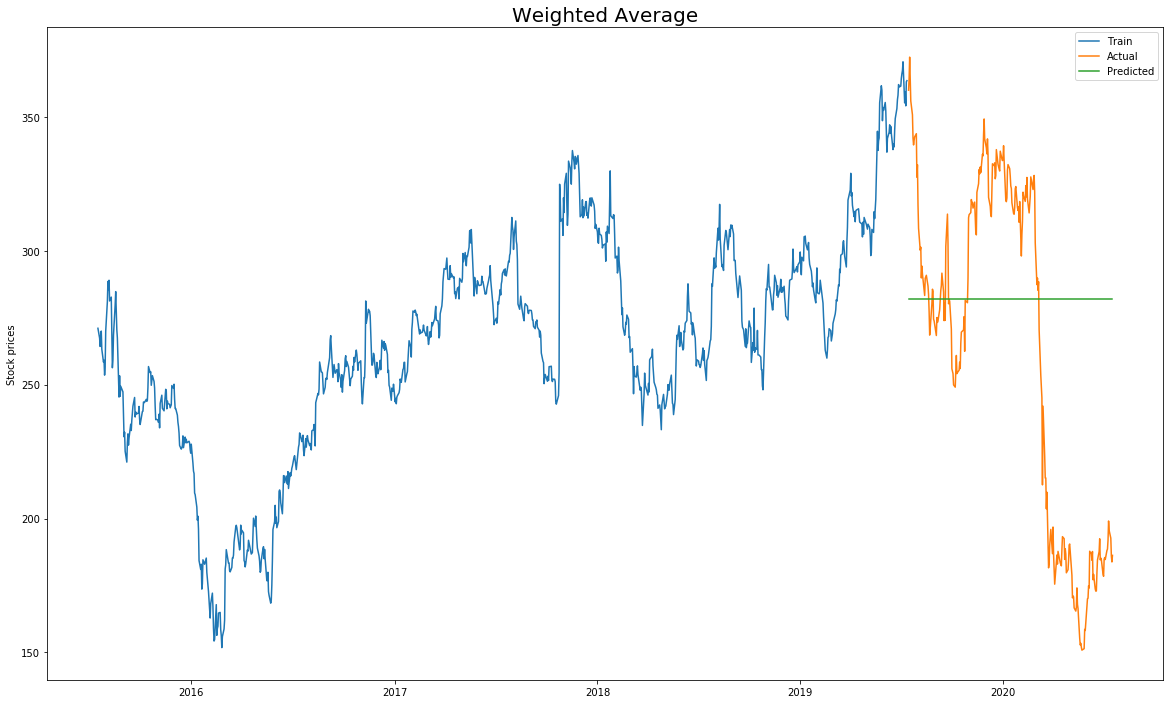

In [19]:
plot_pred(y_wa,"Weighted Average")

In [20]:
stock_price = df.iloc[-230:]

In [21]:
y_train = stock_price.iloc[-150:-50]
y_test = stock_price.iloc[-50:]
print("y train:",y_train.shape,"\ny test:",y_test.shape)

y train: (100, 1) 
y test: (50, 1)


There are 100 days in training and 50 days in testing set. We will construct the features, that is the last 80 days stock for each date in the y_train and y_test. This would be our target variable.

In [22]:
X_train = np.zeros((1,80))
for i in range(100):
    a = np.asarray(stock_price[i:i+80])
    print(a.T.shape)
    X_train = np.concatenate((X_train, a.T))
    print(X_train.shape)

(1, 80)
(2, 80)
(1, 80)
(3, 80)
(1, 80)
(4, 80)
(1, 80)
(5, 80)
(1, 80)
(6, 80)
(1, 80)
(7, 80)
(1, 80)
(8, 80)
(1, 80)
(9, 80)
(1, 80)
(10, 80)
(1, 80)
(11, 80)
(1, 80)
(12, 80)
(1, 80)
(13, 80)
(1, 80)
(14, 80)
(1, 80)
(15, 80)
(1, 80)
(16, 80)
(1, 80)
(17, 80)
(1, 80)
(18, 80)
(1, 80)
(19, 80)
(1, 80)
(20, 80)
(1, 80)
(21, 80)
(1, 80)
(22, 80)
(1, 80)
(23, 80)
(1, 80)
(24, 80)
(1, 80)
(25, 80)
(1, 80)
(26, 80)
(1, 80)
(27, 80)
(1, 80)
(28, 80)
(1, 80)
(29, 80)
(1, 80)
(30, 80)
(1, 80)
(31, 80)
(1, 80)
(32, 80)
(1, 80)
(33, 80)
(1, 80)
(34, 80)
(1, 80)
(35, 80)
(1, 80)
(36, 80)
(1, 80)
(37, 80)
(1, 80)
(38, 80)
(1, 80)
(39, 80)
(1, 80)
(40, 80)
(1, 80)
(41, 80)
(1, 80)
(42, 80)
(1, 80)
(43, 80)
(1, 80)
(44, 80)
(1, 80)
(45, 80)
(1, 80)
(46, 80)
(1, 80)
(47, 80)
(1, 80)
(48, 80)
(1, 80)
(49, 80)
(1, 80)
(50, 80)
(1, 80)
(51, 80)
(1, 80)
(52, 80)
(1, 80)
(53, 80)
(1, 80)
(54, 80)
(1, 80)
(55, 80)
(1, 80)
(56, 80)
(1, 80)
(57, 80)
(1, 80)
(58, 80)
(1, 80)
(59, 80)
(1, 80)
(60, 80)
(1, 8

In [23]:
X_train = X_train[1: , :]

In [24]:
X_train = pd.DataFrame(X_train)

In [25]:
X_train.index = y_train.index

In [26]:
X_train.columns = range(80,0,-1)

In [27]:
X_test = np.zeros((1,80))
for i in range(100,150):
    a = np.asarray(stock_price[i:i+80])
    print(a.T.shape)
    X_test = np.concatenate((X_test, a.T))
    print(X_test.shape)

(1, 80)
(2, 80)
(1, 80)
(3, 80)
(1, 80)
(4, 80)
(1, 80)
(5, 80)
(1, 80)
(6, 80)
(1, 80)
(7, 80)
(1, 80)
(8, 80)
(1, 80)
(9, 80)
(1, 80)
(10, 80)
(1, 80)
(11, 80)
(1, 80)
(12, 80)
(1, 80)
(13, 80)
(1, 80)
(14, 80)
(1, 80)
(15, 80)
(1, 80)
(16, 80)
(1, 80)
(17, 80)
(1, 80)
(18, 80)
(1, 80)
(19, 80)
(1, 80)
(20, 80)
(1, 80)
(21, 80)
(1, 80)
(22, 80)
(1, 80)
(23, 80)
(1, 80)
(24, 80)
(1, 80)
(25, 80)
(1, 80)
(26, 80)
(1, 80)
(27, 80)
(1, 80)
(28, 80)
(1, 80)
(29, 80)
(1, 80)
(30, 80)
(1, 80)
(31, 80)
(1, 80)
(32, 80)
(1, 80)
(33, 80)
(1, 80)
(34, 80)
(1, 80)
(35, 80)
(1, 80)
(36, 80)
(1, 80)
(37, 80)
(1, 80)
(38, 80)
(1, 80)
(39, 80)
(1, 80)
(40, 80)
(1, 80)
(41, 80)
(1, 80)
(42, 80)
(1, 80)
(43, 80)
(1, 80)
(44, 80)
(1, 80)
(45, 80)
(1, 80)
(46, 80)
(1, 80)
(47, 80)
(1, 80)
(48, 80)
(1, 80)
(49, 80)
(1, 80)
(50, 80)
(1, 80)
(51, 80)


In [28]:
X_test = X_test[1: , :]
X_test = pd.DataFrame(X_test)
X_test.index = y_test.index
X_test.columns = range(80,0,-1)

X_train is now a collection of 100 dates as index and a collection of stock prices of previous 80 days as features.

  Similarlily, X_test is now a collection of 50 dates as index and a collection of stock prices of previous 80 days as features.

  We will use these values for stock price prediction in the other four methods.

# 3. Moving Average

We have to predict the 50 values in data set and for each values we will get the average of previous 80 days.
This will be a simple mean of each column in the y_test.

In [29]:
prev_values = stock_price.iloc[-230:-50]
y_test = stock_price.iloc[-50:]
print(prev_values.shape, y_test.shape)

(180, 1) (50, 1)


In [30]:
y_test.shape

(50, 1)

In [31]:
y_ma = X_test.mean(axis=1)
mse(y_ma,y_test)

2756.2027183371056

In [32]:
stock_price.shape

(230, 1)

In [33]:
def plot_pred(pred, title):
    plt.figure(figsize = (20,12))
    plt.plot(prev_values, label = 'Train')
    plt.plot(y_test, label = 'Actual')
    plt.plot(pred, label = 'Predicted')
    plt.ylabel("Stock prices")
    plt.title(title, fontsize = 20)
    plt.legend()
    plt.show()

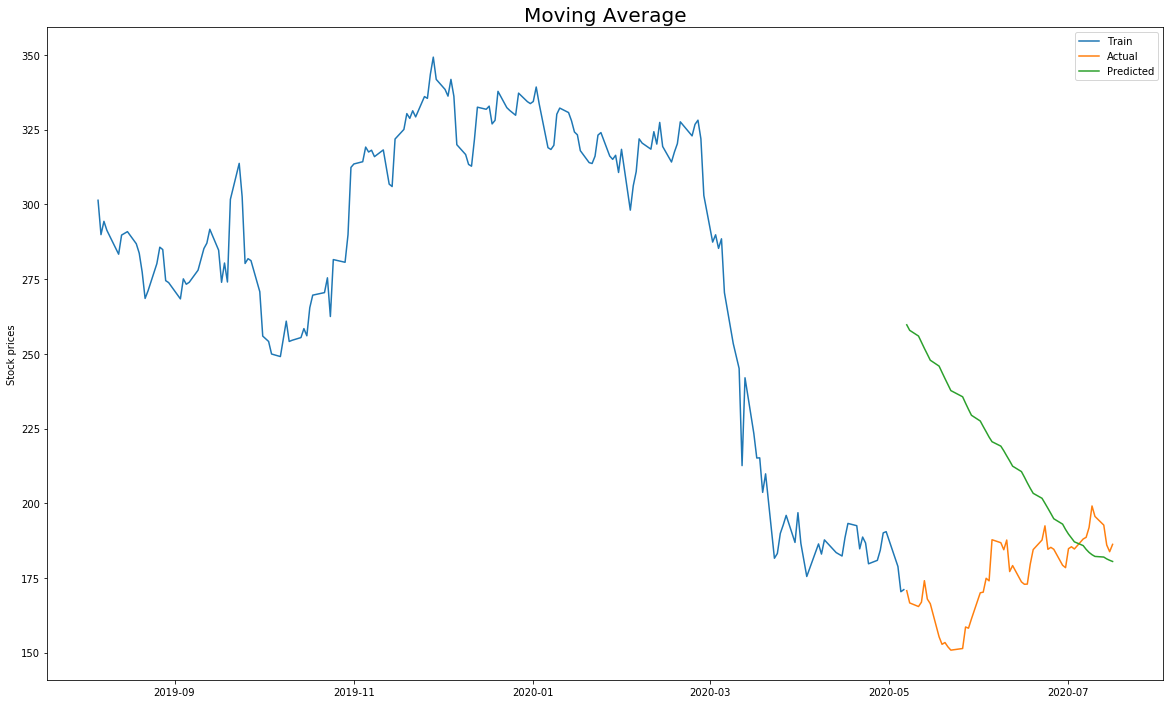

In [34]:
plot_pred(y_ma,"Moving Average")

# 4. Weighted Moving Average

We will obtain the stock price on the test data by calculating the weighted mean of past 80 days. The last of the 80 day will have a weightage of 1(=80/80) and the first will have a weightage of 1/80.

In [35]:
weight = np.array(range(1,81))/80

In [36]:
#weighted moving average
y_wma = X_test@weight/sum(weight)

In [37]:
mse(y_wma, y_test)

905.5249024281178

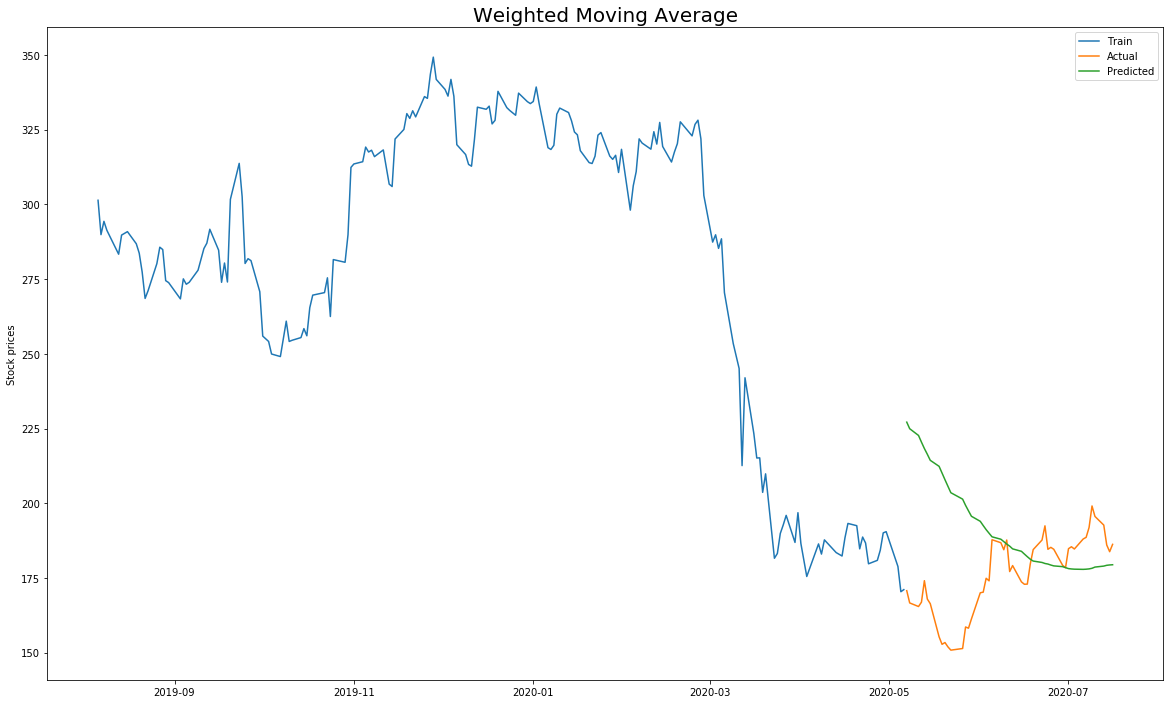

In [38]:
plot_pred(y_wma,"Weighted Moving Average")

# 5. Linear Regression

In this method, we will perform a linear regression on our dataset. The values will be predicted as a linear combination of the previous 80 days values.

In [39]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [92]:
X_train

,80,79,78,77,76,75,74,73,72,71,...,10,9,8,7,6,5,4,3,2,1
Date,,,,,,,,,,,,,,,,,,,,,
2015-11-16,271.100006,267.450012,264.299988,268.549988,270.049988,263.250000,258.450012,259.200012,253.600006,256.799988,...,236.949997,237.050003,236.899994,235.949997,239.000000,233.899994,243.000000,246.100006,241.199997,240.250000
2015-11-17,267.450012,264.299988,268.549988,270.049988,263.250000,258.450012,259.200012,253.600006,256.799988,270.049988,...,237.050003,236.899994,235.949997,239.000000,233.899994,243.000000,246.100006,241.199997,240.250000,248.300003
2015-11-18,264.299988,268.549988,270.049988,263.250000,258.450012,259.200012,253.600006,256.799988,270.049988,281.049988,...,236.899994,235.949997,239.000000,233.899994,243.000000,246.100006,241.199997,240.250000,248.300003,247.850006
2015-11-19,268.549988,270.049988,263.250000,258.450012,259.200012,253.600006,256.799988,270.049988,281.049988,288.600006,...,235.949997,239.000000,233.899994,243.000000,246.100006,241.199997,240.250000,248.300003,247.850006,241.000000
2015-11-20,270.049988,263.250000,258.450012,259.200012,253.600006,256.799988,270.049988,281.049988,288.600006,285.399994,...,239.000000,233.899994,243.000000,246.100006,241.199997,240.250000,248.300003,247.850006,241.000000,243.899994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-04,317.149994,308.450012,300.250000,301.399994,289.899994,294.350006,291.350006,283.350006,289.750000,290.899994,...,328.799988,331.350006,329.299988,336.100006,335.500000,343.549988,349.299988,341.850006,338.500000,336.250000
2019-12-05,308.450012,300.250000,301.399994,289.899994,294.350006,291.350006,283.350006,289.750000,290.899994,286.850006,...,331.350006,329.299988,336.100006,335.500000,343.549988,349.299988,341.850006,338.500000,336.250000,341.850006
2019-12-06,300.250000,301.399994,289.899994,294.350006,291.350006,283.350006,289.750000,290.899994,286.850006,283.700012,...,329.299988,336.100006,335.500000,343.549988,349.299988,341.850006,338.500000,336.250000,341.850006,336.200012


In [93]:
y_train

,Close
Date,
2015-07-17,271.100006
2015-07-20,267.450012
2015-07-21,264.299988
2015-07-22,268.549988
2015-07-23,270.049988
...,...
2020-01-02,339.299988
2020-01-03,333.700012
2020-01-06,319.000000


In [40]:
lr.fit(X_train, y_train)
y_lr = lr.predict(X_test)

In [41]:
y_lr = pd.DataFrame(y_lr) #, index = y_test.index)
y_lr.index = y_test.index

In [42]:
mse(y_test,y_lr)

302.13765066522774

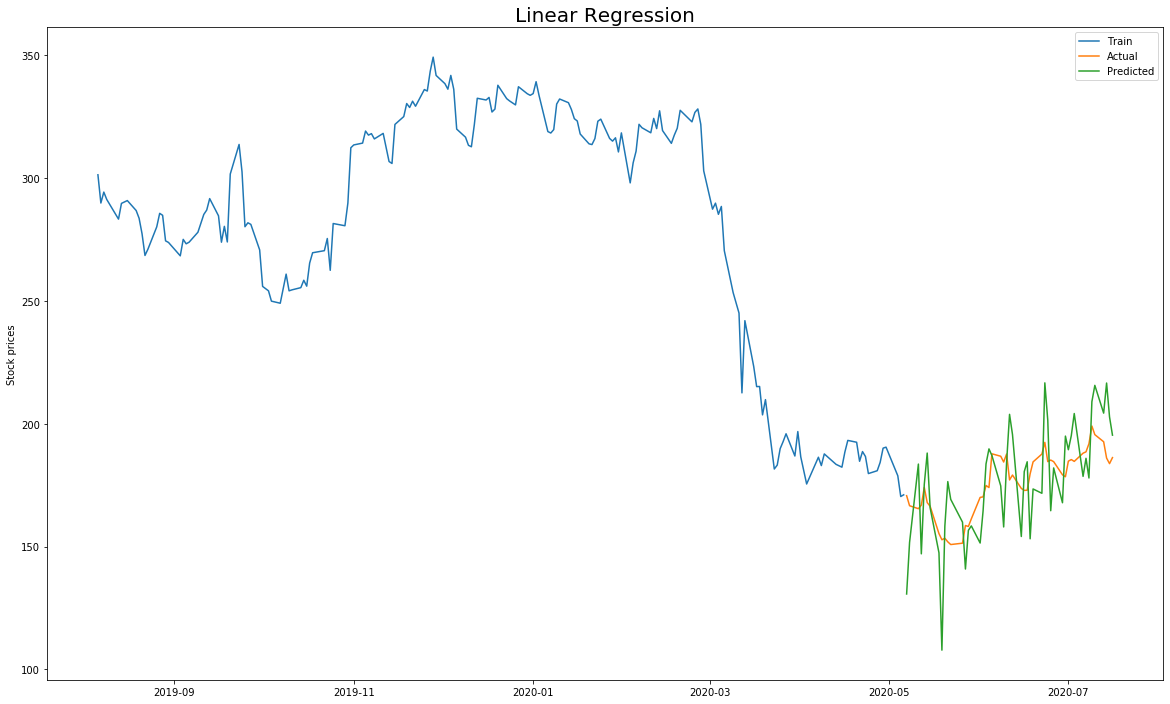

In [43]:
plot_pred(y_lr,"Linear Regression")

# 6. Weighted Linear Regression

We will provide weightage to our input data rather than the features.

In [44]:
weight = np.array(range(1,101))/100
wlr = LinearRegression()

In [45]:
wlr.fit(X_train, y_train, weight)
y_wlr = wlr.predict(X_test)

In [46]:
y_wlr = pd.DataFrame(y_wlr) # ,index=y_test.index)
y_wlr.index = y_test.index

In [47]:
mse(y_test,y_wlr)

538.7577528770887

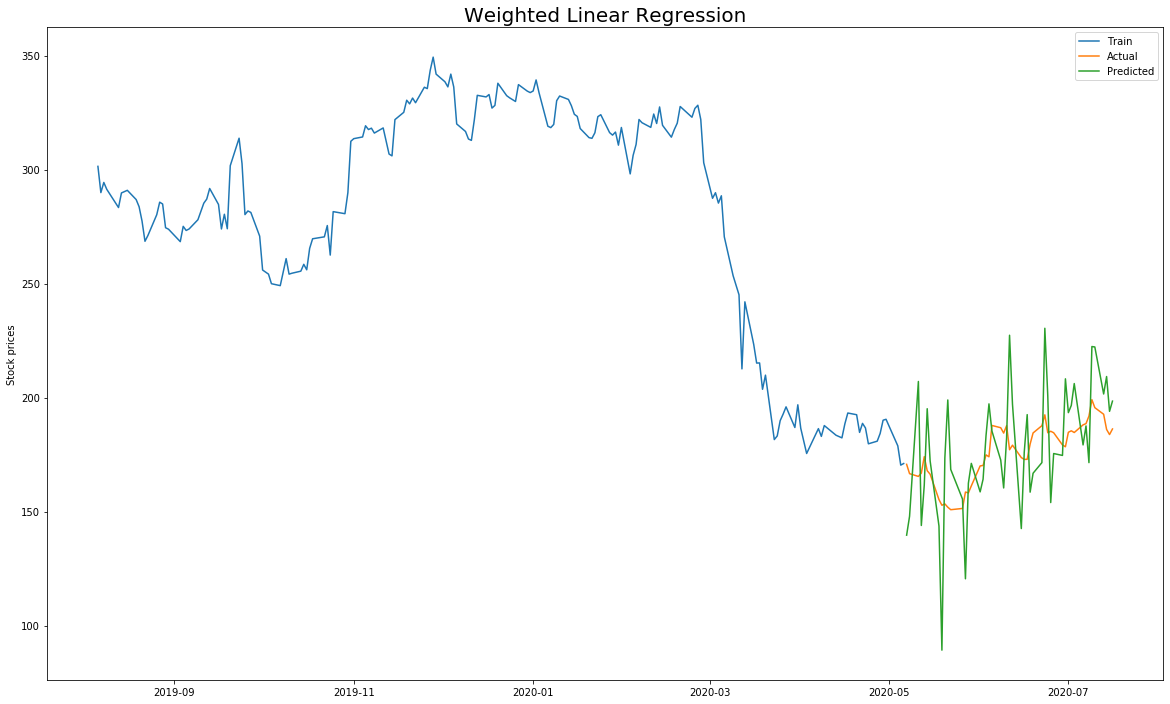

In [48]:
plot_pred(y_wlr,"Weighted Linear Regression")

# 7. Lasso Regression

Linear Regression with L1 regulations.

In [49]:
from sklearn.linear_model import Lasso
lasso = Lasso()

las = lasso.fit(X_train, y_train)
y_las = las.predict(X_test)
y_las = pd.DataFrame(y_las) #,index = y_test.index)
y_las.index = y_test.index
mse(y_las,y_test)

152.80102905692308

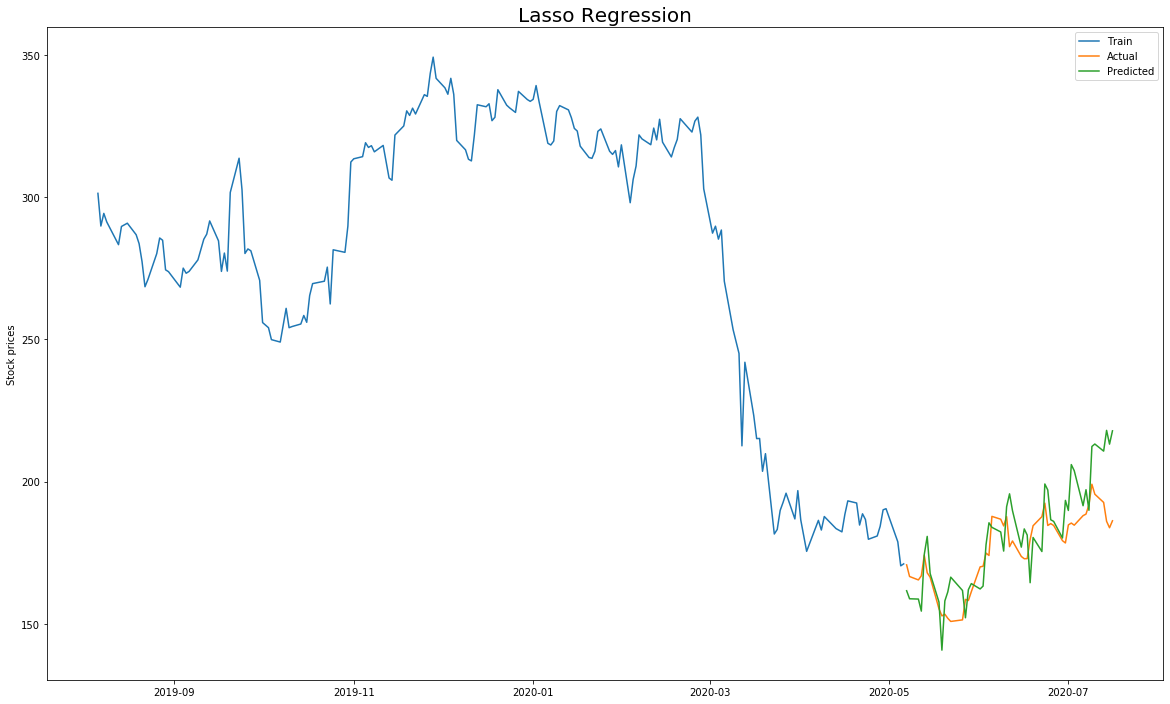

In [50]:
plot_pred(y_las,"Lasso Regression")

# 8. Moving window Neural Network

We construct a simple Feed Forward network taking 80 features as our input

In [51]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [52]:
df.shape

(1228, 1)

In [53]:
X_train = np.zeros((1,80))
for i in range(1000):
    a = np.asarray(df[i:i+80])
    print(a.T.shape)
    X_train = np.concatenate((X_train, a.T))
    print(X_train.shape)

(1, 80)
(2, 80)
(1, 80)
(3, 80)
(1, 80)
(4, 80)
(1, 80)
(5, 80)
(1, 80)
(6, 80)
(1, 80)
(7, 80)
(1, 80)
(8, 80)
(1, 80)
(9, 80)
(1, 80)
(10, 80)
(1, 80)
(11, 80)
(1, 80)
(12, 80)
(1, 80)
(13, 80)
(1, 80)
(14, 80)
(1, 80)
(15, 80)
(1, 80)
(16, 80)
(1, 80)
(17, 80)
(1, 80)
(18, 80)
(1, 80)
(19, 80)
(1, 80)
(20, 80)
(1, 80)
(21, 80)
(1, 80)
(22, 80)
(1, 80)
(23, 80)
(1, 80)
(24, 80)
(1, 80)
(25, 80)
(1, 80)
(26, 80)
(1, 80)
(27, 80)
(1, 80)
(28, 80)
(1, 80)
(29, 80)
(1, 80)
(30, 80)
(1, 80)
(31, 80)
(1, 80)
(32, 80)
(1, 80)
(33, 80)
(1, 80)
(34, 80)
(1, 80)
(35, 80)
(1, 80)
(36, 80)
(1, 80)
(37, 80)
(1, 80)
(38, 80)
(1, 80)
(39, 80)
(1, 80)
(40, 80)
(1, 80)
(41, 80)
(1, 80)
(42, 80)
(1, 80)
(43, 80)
(1, 80)
(44, 80)
(1, 80)
(45, 80)
(1, 80)
(46, 80)
(1, 80)
(47, 80)
(1, 80)
(48, 80)
(1, 80)
(49, 80)
(1, 80)
(50, 80)
(1, 80)
(51, 80)
(1, 80)
(52, 80)
(1, 80)
(53, 80)
(1, 80)
(54, 80)
(1, 80)
(55, 80)
(1, 80)
(56, 80)
(1, 80)
(57, 80)
(1, 80)
(58, 80)
(1, 80)
(59, 80)
(1, 80)
(60, 80)
(1, 8

(469, 80)
(1, 80)
(470, 80)
(1, 80)
(471, 80)
(1, 80)
(472, 80)
(1, 80)
(473, 80)
(1, 80)
(474, 80)
(1, 80)
(475, 80)
(1, 80)
(476, 80)
(1, 80)
(477, 80)
(1, 80)
(478, 80)
(1, 80)
(479, 80)
(1, 80)
(480, 80)
(1, 80)
(481, 80)
(1, 80)
(482, 80)
(1, 80)
(483, 80)
(1, 80)
(484, 80)
(1, 80)
(485, 80)
(1, 80)
(486, 80)
(1, 80)
(487, 80)
(1, 80)
(488, 80)
(1, 80)
(489, 80)
(1, 80)
(490, 80)
(1, 80)
(491, 80)
(1, 80)
(492, 80)
(1, 80)
(493, 80)
(1, 80)
(494, 80)
(1, 80)
(495, 80)
(1, 80)
(496, 80)
(1, 80)
(497, 80)
(1, 80)
(498, 80)
(1, 80)
(499, 80)
(1, 80)
(500, 80)
(1, 80)
(501, 80)
(1, 80)
(502, 80)
(1, 80)
(503, 80)
(1, 80)
(504, 80)
(1, 80)
(505, 80)
(1, 80)
(506, 80)
(1, 80)
(507, 80)
(1, 80)
(508, 80)
(1, 80)
(509, 80)
(1, 80)
(510, 80)
(1, 80)
(511, 80)
(1, 80)
(512, 80)
(1, 80)
(513, 80)
(1, 80)
(514, 80)
(1, 80)
(515, 80)
(1, 80)
(516, 80)
(1, 80)
(517, 80)
(1, 80)
(518, 80)
(1, 80)
(519, 80)
(1, 80)
(520, 80)
(1, 80)
(521, 80)
(1, 80)
(522, 80)
(1, 80)
(523, 80)
(1, 80)
(524, 80)


In [54]:
X_train = X_train[1: , :]
X_train.shape

(1000, 80)

In [55]:
X_train = pd.DataFrame(X_train)

In [56]:
y_train = df[80:1080]
y_train.shape

(1000, 1)

In [57]:
X_train.index = y_train.index

In [58]:
X_train.columns = range(80,0,-1)

In [59]:
X_test = np.zeros((1,80))
for i in range(1000,1148):
    a = np.asarray(df[i:i+80])
    print(a.T.shape)
    X_test = np.concatenate((X_test, a.T))
    print(X_test.shape)

(1, 80)
(2, 80)
(1, 80)
(3, 80)
(1, 80)
(4, 80)
(1, 80)
(5, 80)
(1, 80)
(6, 80)
(1, 80)
(7, 80)
(1, 80)
(8, 80)
(1, 80)
(9, 80)
(1, 80)
(10, 80)
(1, 80)
(11, 80)
(1, 80)
(12, 80)
(1, 80)
(13, 80)
(1, 80)
(14, 80)
(1, 80)
(15, 80)
(1, 80)
(16, 80)
(1, 80)
(17, 80)
(1, 80)
(18, 80)
(1, 80)
(19, 80)
(1, 80)
(20, 80)
(1, 80)
(21, 80)
(1, 80)
(22, 80)
(1, 80)
(23, 80)
(1, 80)
(24, 80)
(1, 80)
(25, 80)
(1, 80)
(26, 80)
(1, 80)
(27, 80)
(1, 80)
(28, 80)
(1, 80)
(29, 80)
(1, 80)
(30, 80)
(1, 80)
(31, 80)
(1, 80)
(32, 80)
(1, 80)
(33, 80)
(1, 80)
(34, 80)
(1, 80)
(35, 80)
(1, 80)
(36, 80)
(1, 80)
(37, 80)
(1, 80)
(38, 80)
(1, 80)
(39, 80)
(1, 80)
(40, 80)
(1, 80)
(41, 80)
(1, 80)
(42, 80)
(1, 80)
(43, 80)
(1, 80)
(44, 80)
(1, 80)
(45, 80)
(1, 80)
(46, 80)
(1, 80)
(47, 80)
(1, 80)
(48, 80)
(1, 80)
(49, 80)
(1, 80)
(50, 80)
(1, 80)
(51, 80)
(1, 80)
(52, 80)
(1, 80)
(53, 80)
(1, 80)
(54, 80)
(1, 80)
(55, 80)
(1, 80)
(56, 80)
(1, 80)
(57, 80)
(1, 80)
(58, 80)
(1, 80)
(59, 80)
(1, 80)
(60, 80)
(1, 8

In [60]:
y_test = df[1080:]
y_test.shape

(148, 1)

In [61]:
X_test = X_test[1: , :]
X_test = pd.DataFrame(X_test)

In [62]:
X_test.index = y_test.index
X_test.columns = range(80,0,-1)

In [63]:
#moving average Neural Network
ma_nn = Sequential([Dense(64, input_shape=(80,),activation='relu'), Dense(32, activation = 'linear'), Dense(1)])

ma_nn.compile(loss = 'mse', optimizer='adam', metrics = ['mae','mse'])

history = ma_nn.fit(X_train, y_train, epochs=250, batch_size = 16, validation_split = 0.1)


Train on 900 samples, validate on 100 samples
Epoch 1/250
900/900 [==============================] - 0s 448us/step - loss: 28963.6168 - mae: 107.4849 - mse: 28963.6230 - val_loss: 1962.5009 - val_mae: 38.5539 - val_mse: 1962.5011
Epoch 2/250
900/900 [==============================] - 0s 109us/step - loss: 497.1195 - mae: 17.1964 - mse: 497.1195 - val_loss: 1288.8401 - val_mae: 31.3589 - val_mse: 1288.8401
Epoch 3/250
900/900 [==============================] - 0s 106us/step - loss: 352.8099 - mae: 14.5081 - mse: 352.8100 - val_loss: 1254.8895 - val_mae: 30.3461 - val_mse: 1254.8895
Epoch 4/250
900/900 [==============================] - 0s 106us/step - loss: 313.2365 - mae: 13.7152 - mse: 313.2365 - val_loss: 1248.2561 - val_mae: 29.7497 - val_mse: 1248.2562
Epoch 5/250
900/900 [==============================] - 0s 107us/step - loss: 290.8972 - mae: 13.3361 - mse: 290.8972 - val_loss: 999.4804 - val_mae: 26.6677 - val_mse: 999.4804
Epoch 6/250
900/900 [==============================] - 

Epoch 46/250
900/900 [==============================] - 0s 123us/step - loss: 97.6398 - mae: 7.5200 - mse: 97.6399 - val_loss: 312.0422 - val_mae: 14.8449 - val_mse: 312.0422
Epoch 47/250
900/900 [==============================] - 0s 149us/step - loss: 111.6303 - mae: 8.2334 - mse: 111.6303 - val_loss: 225.8190 - val_mae: 12.5565 - val_mse: 225.8190
Epoch 48/250
900/900 [==============================] - 0s 146us/step - loss: 94.2577 - mae: 7.4427 - mse: 94.2577 - val_loss: 198.3035 - val_mae: 11.3776 - val_mse: 198.3035
Epoch 49/250
900/900 [==============================] - 0s 151us/step - loss: 107.7575 - mae: 8.1118 - mse: 107.7575 - val_loss: 385.3029 - val_mae: 16.6125 - val_mse: 385.3029
Epoch 50/250
900/900 [==============================] - 0s 147us/step - loss: 125.5941 - mae: 8.5619 - mse: 125.5942 - val_loss: 172.3407 - val_mae: 10.4836 - val_mse: 172.3407
Epoch 51/250
900/900 [==============================] - 0s 146us/step - loss: 103.1548 - mae: 7.8183 - mse: 103.1548 - 

Epoch 93/250
900/900 [==============================] - 0s 151us/step - loss: 65.0063 - mae: 6.0964 - mse: 65.0063 - val_loss: 149.0619 - val_mae: 9.7447 - val_mse: 149.0619
Epoch 94/250
900/900 [==============================] - 0s 139us/step - loss: 62.6072 - mae: 5.9951 - mse: 62.6072 - val_loss: 162.1491 - val_mae: 10.1811 - val_mse: 162.1492
Epoch 95/250
900/900 [==============================] - 0s 141us/step - loss: 78.0900 - mae: 6.7719 - mse: 78.0900 - val_loss: 115.3940 - val_mae: 8.5280 - val_mse: 115.3940
Epoch 96/250
900/900 [==============================] - 0s 148us/step - loss: 69.1876 - mae: 6.2439 - mse: 69.1876 - val_loss: 137.5988 - val_mae: 9.2921 - val_mse: 137.5988
Epoch 97/250
900/900 [==============================] - 0s 152us/step - loss: 57.8746 - mae: 5.5761 - mse: 57.8746 - val_loss: 117.8621 - val_mae: 8.5647 - val_mse: 117.8621
Epoch 98/250
900/900 [==============================] - 0s 149us/step - loss: 65.0777 - mae: 5.9938 - mse: 65.0777 - val_loss: 12

Epoch 140/250
900/900 [==============================] - 0s 140us/step - loss: 61.1240 - mae: 5.7857 - mse: 61.1240 - val_loss: 108.9688 - val_mae: 8.2362 - val_mse: 108.9688
Epoch 141/250
900/900 [==============================] - 0s 146us/step - loss: 53.2279 - mae: 5.4080 - mse: 53.2279 - val_loss: 165.3802 - val_mae: 10.4664 - val_mse: 165.3802
Epoch 142/250
900/900 [==============================] - 0s 147us/step - loss: 71.6624 - mae: 6.4079 - mse: 71.6624 - val_loss: 124.7074 - val_mae: 9.0214 - val_mse: 124.7074
Epoch 143/250
900/900 [==============================] - 0s 144us/step - loss: 60.3477 - mae: 5.7772 - mse: 60.3477 - val_loss: 215.9522 - val_mae: 12.2192 - val_mse: 215.9522
Epoch 144/250
900/900 [==============================] - 0s 140us/step - loss: 68.5069 - mae: 6.2181 - mse: 68.5069 - val_loss: 146.8018 - val_mae: 9.8007 - val_mse: 146.8018
Epoch 145/250
900/900 [==============================] - 0s 147us/step - loss: 54.8044 - mae: 5.4906 - mse: 54.8044 - val_l

Epoch 187/250
900/900 [==============================] - 0s 145us/step - loss: 55.2845 - mae: 5.5840 - mse: 55.2845 - val_loss: 151.7127 - val_mae: 9.9483 - val_mse: 151.7128
Epoch 188/250
900/900 [==============================] - 0s 141us/step - loss: 55.4137 - mae: 5.6440 - mse: 55.4137 - val_loss: 250.2321 - val_mae: 13.4773 - val_mse: 250.2321
Epoch 189/250
900/900 [==============================] - 0s 143us/step - loss: 59.5471 - mae: 5.9278 - mse: 59.5471 - val_loss: 136.9763 - val_mae: 9.4924 - val_mse: 136.9763
Epoch 190/250
900/900 [==============================] - 0s 147us/step - loss: 65.1870 - mae: 6.1922 - mse: 65.1870 - val_loss: 146.6311 - val_mae: 9.7546 - val_mse: 146.6311
Epoch 191/250
900/900 [==============================] - 0s 141us/step - loss: 62.7680 - mae: 6.1060 - mse: 62.7680 - val_loss: 144.1383 - val_mae: 9.6625 - val_mse: 144.1383
Epoch 192/250
900/900 [==============================] - 0s 138us/step - loss: 60.2335 - mae: 5.7594 - mse: 60.2335 - val_lo

Epoch 234/250
900/900 [==============================] - 0s 149us/step - loss: 60.9476 - mae: 5.9668 - mse: 60.9476 - val_loss: 132.7469 - val_mae: 9.2916 - val_mse: 132.7469
Epoch 235/250
900/900 [==============================] - 0s 142us/step - loss: 49.5765 - mae: 5.2126 - mse: 49.5765 - val_loss: 114.4495 - val_mae: 8.5945 - val_mse: 114.4495
Epoch 236/250
900/900 [==============================] - 0s 141us/step - loss: 48.7098 - mae: 5.2084 - mse: 48.7098 - val_loss: 1001.0492 - val_mae: 30.1312 - val_mse: 1001.0491
Epoch 237/250
900/900 [==============================] - 0s 142us/step - loss: 120.6189 - mae: 8.5617 - mse: 120.6189 - val_loss: 284.7963 - val_mae: 14.1535 - val_mse: 284.7963
Epoch 238/250
900/900 [==============================] - 0s 149us/step - loss: 69.0966 - mae: 6.2914 - mse: 69.0966 - val_loss: 117.0926 - val_mae: 8.6920 - val_mse: 117.0926
Epoch 239/250
900/900 [==============================] - 0s 143us/step - loss: 70.2542 - mae: 6.3891 - mse: 70.2542 - v

In [64]:
y_nn = ma_nn.predict(X_test)

In [65]:
y_nn = pd.DataFrame(y_nn) # ,index=y_test.index)

In [66]:
y_nn.index = y_test.index

In [67]:
mse(y_nn, y_test)

251.50971507436594

In [68]:
prev_values = df.iloc[800:1080]
y_test = df.iloc[1080:]

def plot_pred(pred,title):
    plt.figure(figsize=(20,12))
    plt.plot(prev_values,label='Train')
    plt.plot(y_test,label='Actual')
    plt.plot(pred,label='Predicted')
    plt.ylabel("Stock prices")
    plt.title(title,fontsize=20)
    plt.legend()
    plt.show()

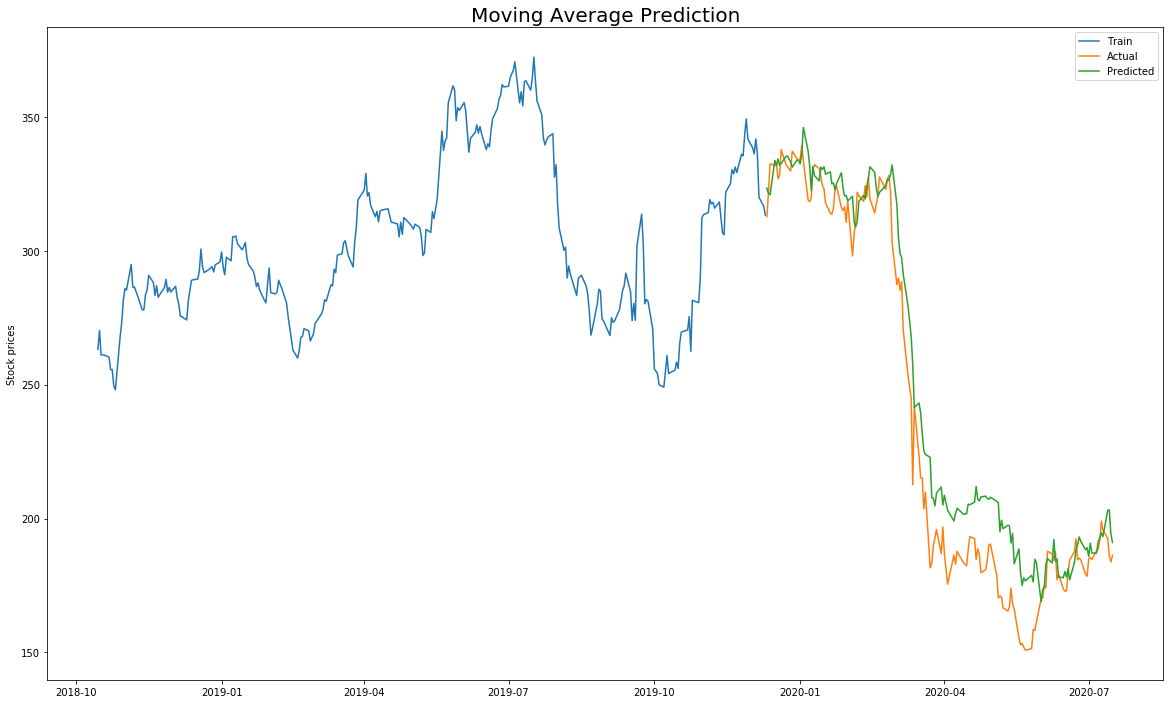

In [69]:
plot_pred(y_nn,"Moving Average Prediction")

# Classical Models for Time series

https://www.kaggle.com/viswanathanc/time-series-stock-price-predictions-part-2

In [70]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
from warnings import filterwarnings
from sklearn.metrics import mean_squared_error as mse
filterwarnings("ignore")

In [71]:
df = pd.read_csv("E:\\IIT Kanpur\\Placements\\Projects\\SBI Stock price prediction\\SBIN.NS.csv", usecols=['Date', 'Close'],
                parse_dates=['Date'], index_col='Date')
df.head()

,Close
Date,
2015-07-17,271.100006
2015-07-20,267.450012
2015-07-21,264.299988
2015-07-22,268.549988
2015-07-23,270.049988


In [72]:
df.shape

(1228, 1)

In [73]:
y_train = df.iloc[:1100]
y_test = df.iloc[1100:]

def plot_pred(pred, title):
    plt.figure(figsize=(20,12))
    plt.plot(y_train, label='Train')
    plt.plot(y_test, label='Actual')
    plt.plot(pred, label='Predicted')
    plt.ylabel("Stock prices")
    plt.title(title, fontsize=20)
    plt.legend()
    plt.show()


In [74]:
print("start:",y_test.index.min())
print("end:",y_test.index.max())

start: 2020-01-09 00:00:00
end: 2020-07-16 00:00:00


# Auto Regression

The prediction will be a linear combination of the past values.

In [75]:
from statsmodels.tsa.ar_model import AR

ar_model = AR(y_train).fit()
y_ar = ar_model.predict(1100,1227)

In [76]:
y_ar

1100    319.802053
1101    318.669790
1102    316.699331
1103    317.261456
1104    316.784139
           ...    
1223    285.417265
1224    285.291589
1225    285.167238
1226    285.044180
1227    284.922381
Length: 128, dtype: float64

In [77]:
y_ar = y_ar.reset_index(drop=True)

In [78]:
y_ar

0      319.802053
1      318.669790
2      316.699331
3      317.261456
4      316.784139
          ...    
123    285.417265
124    285.291589
125    285.167238
126    285.044180
127    284.922381
Length: 128, dtype: float64

In [79]:
y_ar.index = y_test.index

In [80]:
mse(y_ar, y_test)

8172.291133915362

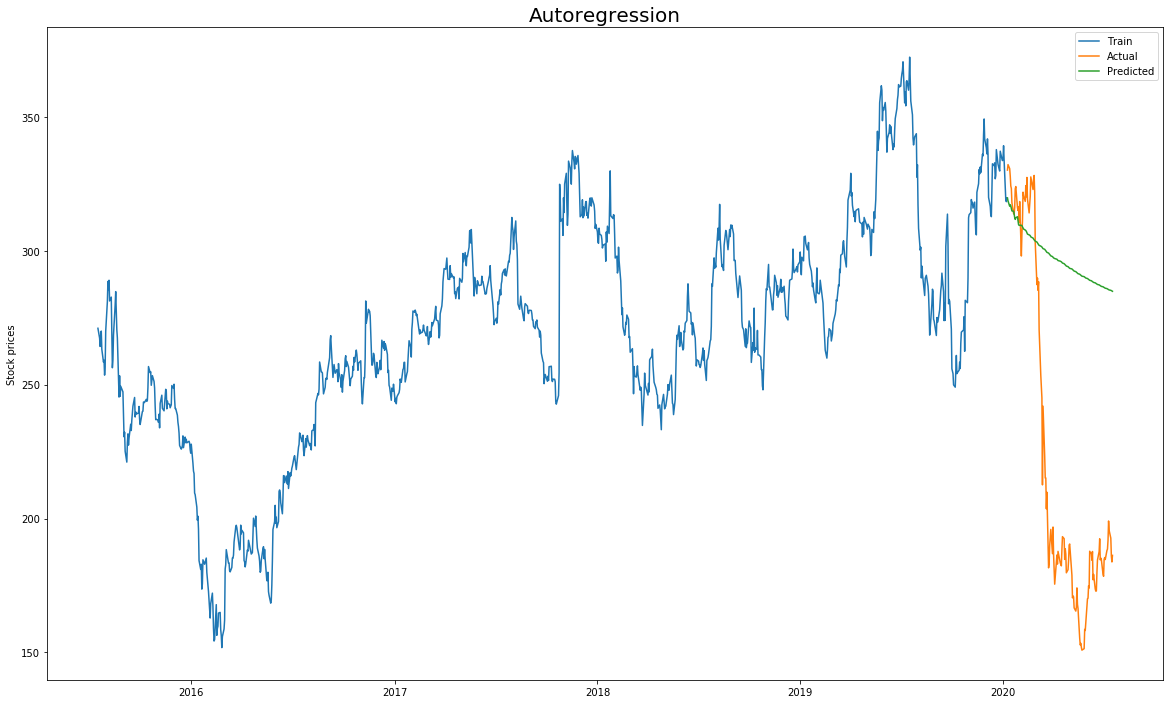

In [81]:
plot_pred(y_ar, "Autoregression")

# Moving Average

Moving Average is not the predictions based on the moving average of the previous values, instead it is the moving average of the residuals of the previous values.

In [82]:
from statsmodels.tsa.arima_model import ARMA

ma = ARMA(y_train, order=(0, 1)).fit()
y_mam = ma.predict(1100,1227)

y_mam.index = y_test.index
mse(y_mam,y_test)

5931.385812967075

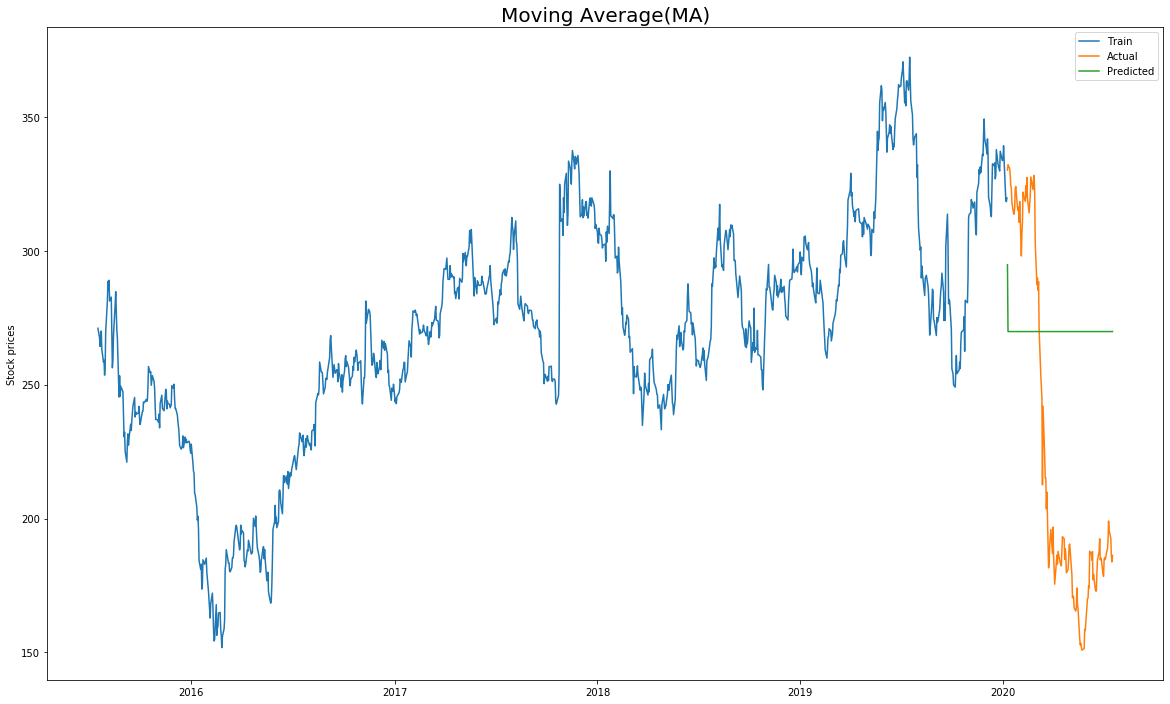

In [83]:
plot_pred(y_mam,"Moving Average(MA)")

# ARMA

This is a combination of Auto Regression and Moving Average.

In [84]:
arma = ARMA(y_train,order=(1,1)).fit()
y_arma =arma.predict(1100,1227)
y_arma.index = y_test.index
mse(y_arma,y_test)

8373.989227152048

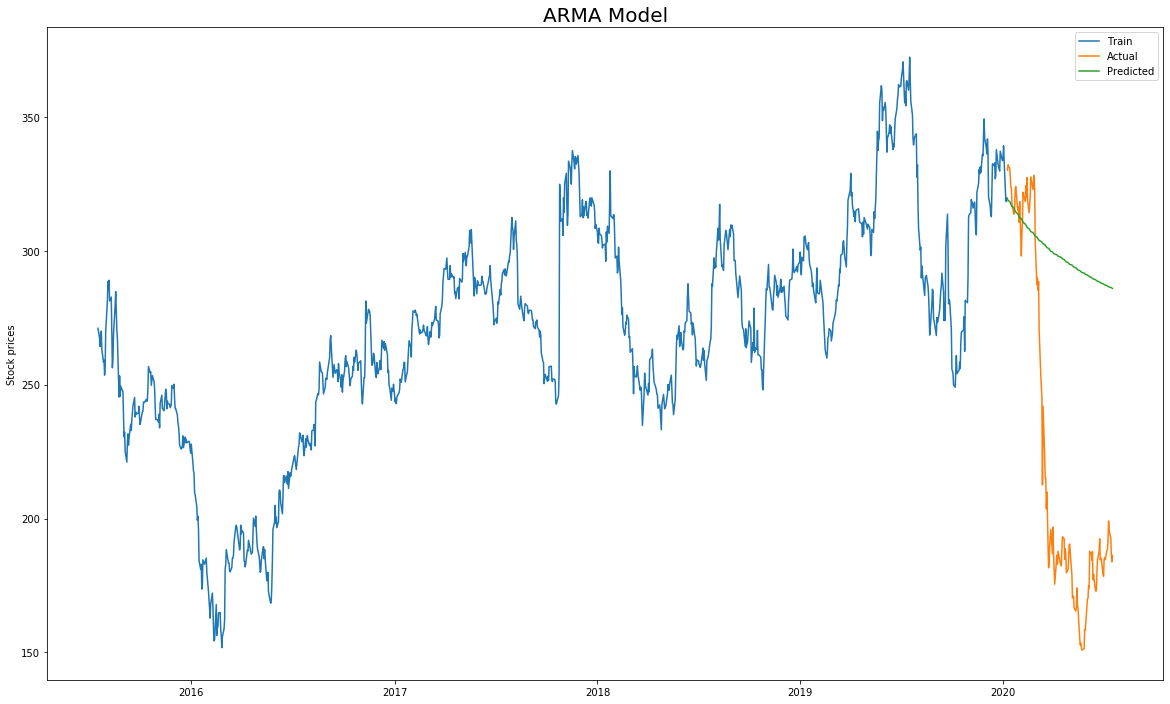

In [85]:
plot_pred(y_arma,"ARMA Model")

# ARIMA

This is an extension of ARMA wherein the 'Integration' term finds the difference of the values in the series. This will reduce the trend. In ARIMA(1,1,1) we will predict the value based on the difference of the previous two values and the moving average of the same two values.

But this unsuitable for Series with Seasonality. We have a seasonality in our data, but we do not have a trend. Lets construct an ARIMA model for this.

In [86]:
from statsmodels.tsa.arima_model import ARIMA

arima = ARIMA(y_train,order=(1,1,1)).fit(disp=False)
y_arima = arima.predict(1100,1227, typ='levels')
y_arima.index = y_test.index
mse(y_arima,y_test)

13534.961308464965

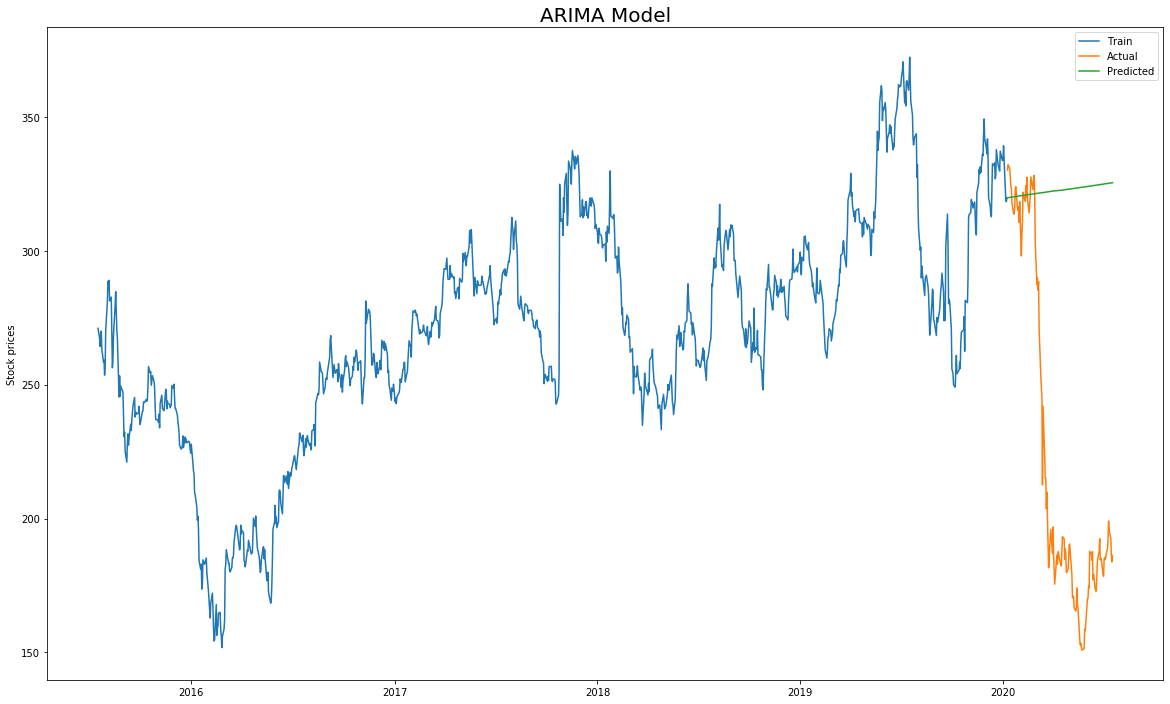

In [87]:
plot_pred(y_arima,"ARIMA Model")

We donot have a good prediction as there is no significant trend in the data!

# SARIMA

Seasonal ARIMA is applicable to time series with trend and seasonality. The results are predicted as the combination of ARIMA model of the entire series and the seasonal component of the time series. Seasonality can be determined from Auto correlation Plots

In [88]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [89]:
sarima = SARIMAX(y_train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12), mle_regression=True).fit(disp=False)

In [90]:
y_sarima = sarima.predict(1100,1227,typ='levels')
y_sarima.index = y_test.index
mse(y_sarima,y_test)
# Here we can assume a max seasonality of 45 since the function requires atleat 4 seasons. 

13196.3532301538

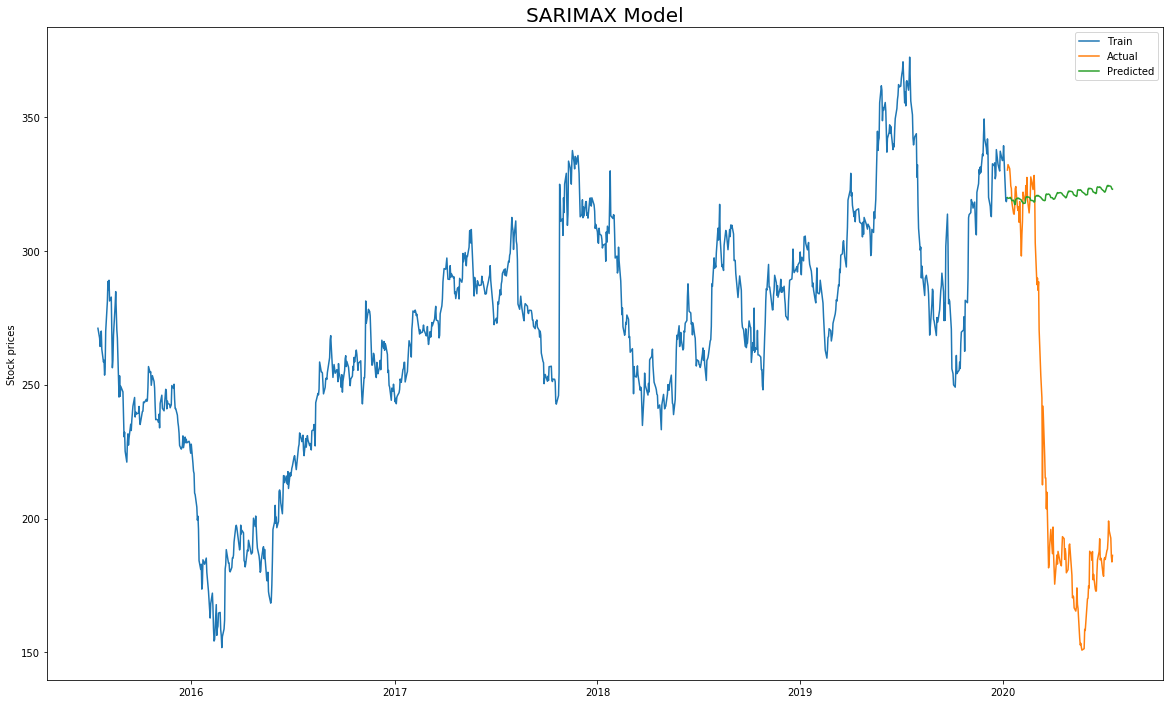

In [91]:
plot_pred(y_sarima,"SARIMAX Model")